## Homework

> Note: sometimes your answer doesn't match one of the options exactly. That's fine. 
Select the option that's closest to your solution.

### Dataset

In this homework, we will use the Car price dataset. Download it from [here](https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv).

Or you can do it with `wget`:

```bash
wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
```

We'll keep working with the `MSRP` variable, and we'll transform it to a classification task. 

In [181]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [182]:
import wget
wget.download('https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv')

100% [..........................................................................] 1475504 / 1475504

'data (6).csv'

In [183]:
# !wget $data -0 data-week-3.csv

In [184]:
df0 = pd.read_csv("data.csv")
df0.head().T

,0,1,2,3,4
Make,BMW,BMW,BMW,BMW,BMW
Model,1 Series M,1 Series,1 Series,1 Series,1 Series
Year,2011,2011,2011,2011,2011
Engine Fuel Type,premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required),premium unleaded (required)
Engine HP,335.0,300.0,300.0,230.0,230.0
Engine Cylinders,6.0,6.0,6.0,6.0,6.0
Transmission Type,MANUAL,MANUAL,MANUAL,MANUAL,MANUAL
Driven_Wheels,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive,rear wheel drive
Number of Doors,2.0,2.0,2.0,2.0,2.0
Market Category,"Factory Tuner,Luxury,High-Performance","Luxury,Performance","Luxury,High-Performance","Luxury,Performance",Luxury


In [185]:
df0.shape

(11914, 16)

### Features

For the rest of the homework, you'll need to use only these columns:

* `Make`,
* `Model`,
* `Year`,
* `Engine HP`,
* `Engine Cylinders`,
* `Transmission Type`,
* `Vehicle Style`,
* `highway MPG`,
* `city mpg`
* `MSRP`

In [186]:
df = df0[["Make","Model","Year","Engine HP","Engine Cylinders","Transmission Type","Vehicle Style","highway MPG","city mpg","MSRP"]].copy()
df.shape

(11914, 10)

In [187]:
df.columns

Index(['Make', 'Model', 'Year', 'Engine HP', 'Engine Cylinders',
       'Transmission Type', 'Vehicle Style', 'highway MPG', 'city mpg',
       'MSRP'],
      dtype='object')

In [188]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11914 entries, 0 to 11913
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Make               11914 non-null  object 
 1   Model              11914 non-null  object 
 2   Year               11914 non-null  int64  
 3   Engine HP          11845 non-null  float64
 4   Engine Cylinders   11884 non-null  float64
 5   Transmission Type  11914 non-null  object 
 6   Vehicle Style      11914 non-null  object 
 7   highway MPG        11914 non-null  int64  
 8   city mpg           11914 non-null  int64  
 9   MSRP               11914 non-null  int64  
dtypes: float64(2), int64(4), object(4)
memory usage: 930.9+ KB


In [189]:
df.describe()

,Year,Engine HP,Engine Cylinders,highway MPG,city mpg,MSRP
count,11914.000000,11845.00000,11884.000000,11914.000000,11914.000000,1.191400e+04
mean,2010.384338,249.38607,5.628829,26.637485,19.733255,4.059474e+04
std,7.579740,109.19187,1.780559,8.863001,8.987798,6.010910e+04
min,1990.000000,55.00000,0.000000,12.000000,7.000000,2.000000e+03
25%,2007.000000,170.00000,4.000000,22.000000,16.000000,2.100000e+04
50%,2015.000000,227.00000,6.000000,26.000000,18.000000,2.999500e+04
75%,2016.000000,300.00000,6.000000,30.000000,22.000000,4.223125e+04
max,2017.000000,1001.00000,16.000000,354.000000,137.000000,2.065902e+06


In [190]:
df.describe(include = object)

,Make,Model,Transmission Type,Vehicle Style
count,11914,11914,11914,11914
unique,48,915,5,16
top,Chevrolet,Silverado 1500,AUTOMATIC,Sedan
freq,1123,156,8266,3048


In [191]:
df.isnull().sum()

Make                  0
Model                 0
Year                  0
Engine HP            69
Engine Cylinders     30
Transmission Type     0
Vehicle Style         0
highway MPG           0
city mpg              0
MSRP                  0
dtype: int64

In [192]:
df.duplicated().sum()

828

### Data preparation

* Select only the features from above and transform their names using next line:
  ```
  data.columns = data.columns.str.replace(' ', '_').str.lower()
  ```
* Fill in the missing values of the selected features with 0.
* Rename `MSRP` variable to `price`.

In [193]:
df.columns = df.columns.str.replace(' ', '_').str.lower()
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'msrp'],
      dtype='object')

In [194]:
# categorical_columns = list(df.dtypes[df.dtypes == "object"].index)
# categorical_columns

In [195]:
# for c in categorical_columns:
#     df[c] = df[c].str.lower().str.replace(" ", "_")

In [196]:
df.isnull().sum()

make                  0
model                 0
year                  0
engine_hp            69
engine_cylinders     30
transmission_type     0
vehicle_style         0
highway_mpg           0
city_mpg              0
msrp                  0
dtype: int64

In [197]:
# df.fillna(0, inplace=True)

df.engine_hp = df.engine_hp.fillna(0)
df.engine_cylinders = df.engine_cylinders.fillna(0)

df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [198]:
df.rename(columns={"msrp": "price"}, inplace=True)
df.columns

Index(['make', 'model', 'year', 'engine_hp', 'engine_cylinders',
       'transmission_type', 'vehicle_style', 'highway_mpg', 'city_mpg',
       'price'],
      dtype='object')

### Question 1

What is the most frequent observation (mode) for the column `transmission_type`?

- `AUTOMATIC`
- `MANUAL`
- `AUTOMATED_MANUAL`
- `DIRECT_DRIVE`

In [199]:
df.transmission_type.value_counts(dropna=False)

AUTOMATIC           8266
MANUAL              2935
AUTOMATED_MANUAL     626
DIRECT_DRIVE          68
UNKNOWN               19
Name: transmission_type, dtype: int64

### Question 2

Create the [correlation matrix](https://www.google.com/search?q=correlation+matrix) for the numerical features of your dataset. 
In a correlation matrix, you compute the correlation coefficient between every pair of features in the dataset.

What are the two features that have the biggest correlation in this dataset?

- `engine_hp` and `year`
- `engine_hp` and `engine_cylinders`
- `highway_mpg` and `engine_cylinders`
- `highway_mpg` and `city_mpg`

<Axes: >

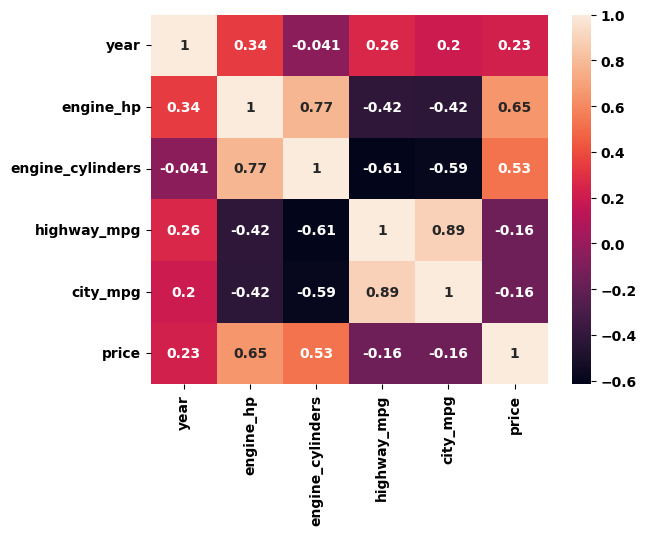

In [200]:
sns.heatmap(df.corr(numeric_only=True), annot=True)

In [201]:
df.corr(numeric_only=True)

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,price
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.227590
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.650095
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.526274
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.160043
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.157676
price,0.227590,0.650095,0.526274,-0.160043,-0.157676,1.000000


### Make `price` binary

* Now we need to turn the `price` variable from numeric into a binary format.
* Let's create a variable `above_average` which is `1` if the `price` is above its mean value and `0` otherwise.

In [202]:
df.price.mean()

40594.737032063116

In [203]:
# df.churn = (df.churn =="yes").astype(int)

df["above_average"] = df.price.apply(lambda x : 1 if x >= df.price.mean() else 0)
df.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,price,above_average
0,BMW,1 Series M,2011,335.0,6.0,MANUAL,Coupe,26,19,46135,1
1,BMW,1 Series,2011,300.0,6.0,MANUAL,Convertible,28,19,40650,1
2,BMW,1 Series,2011,300.0,6.0,MANUAL,Coupe,28,20,36350,0
3,BMW,1 Series,2011,230.0,6.0,MANUAL,Coupe,28,18,29450,0
4,BMW,1 Series,2011,230.0,6.0,MANUAL,Convertible,28,18,34500,0


### Split the data

* Split your data in train/val/test sets with 60%/20%/20% distribution.
* Use Scikit-Learn for that (the `train_test_split` function) and set the seed to `42`.
* Make sure that the target value (`price`) is not in your dataframe.

In [204]:
# df.drop("price", axis=1, inplace=True)
# df.head()

In [205]:
from sklearn.model_selection import train_test_split

In [206]:
train_test_split?

In [207]:
df_full_train, df_test = train_test_split(df.drop("price", axis=1), test_size=0.2, random_state=42)

In [208]:
len(df_full_train), len(df_test)

(9531, 2383)

In [209]:
df_train, df_val = train_test_split(df_full_train, test_size=0.25, random_state=42)

In [210]:
len(df_train), len(df_val), len(df_test)

(7148, 2383, 2383)

In [211]:
df_train = df_train.reset_index(drop=True)
df_val = df_val.reset_index(drop=True)
df_test = df_test.reset_index(drop=True)

In [212]:
df_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Mitsubishi,Endeavor,2011,225.0,6.0,AUTOMATIC,4dr SUV,19,15,0
1,Kia,Borrego,2009,276.0,6.0,AUTOMATIC,4dr SUV,21,17,0
2,Lamborghini,Gallardo,2012,570.0,10.0,MANUAL,Convertible,20,12,1
3,Chevrolet,Colorado,2016,200.0,4.0,AUTOMATIC,Crew Cab Pickup,27,20,0
4,Pontiac,Vibe,2009,158.0,4.0,AUTOMATIC,4dr Hatchback,26,20,0


In [213]:
y_train = df_train.above_average.values
y_val = df_val.above_average.values
y_test = df_test.above_average.values

In [214]:
len(y_train), len(y_val), len(y_test)

(7148, 2383, 2383)

In [215]:
del df_train["above_average"]
del df_val["above_average"]
del df_test["above_average"]

In [216]:
# from sklearn.model_selection import train_test_split

# # Split the data into train, validation, and test sets (60%/20%/20%)

# train_data, temp_data = train_test_split(df, test_size=0.4, random_state=42)
# val_data, test_data = train_test_split(temp_data, test_size=0.5, random_state=42)

# print("Train set shape:", train_data.shape, round((train_data.shape[0]/df.shape[0])*100), "%")
# print("Validation set shape:", val_data.shape, round((val_data.shape[0]/df.shape[0])*100), "%")
# print("Test set shape:", test_data.shape, round((test_data.shape[0]/df.shape[0])*100), "%")

### Question 3

* Calculate the mutual information score between `above_average` and other categorical variables in our dataset. 
  Use the training set only.
* Round the scores to 2 decimals using `round(score, 2)`.

Which of these variables has the lowest mutual information score?
  
- `make`
- `model`
- `transmission_type`
- `vehicle_style`

In [217]:
df_full_train = df_full_train.reset_index(drop=True)
df_full_train.head()

,make,model,year,engine_hp,engine_cylinders,transmission_type,vehicle_style,highway_mpg,city_mpg,above_average
0,Cadillac,CT6,2016,265.0,4.0,AUTOMATIC,Sedan,31,22,1
1,Mercedes-Benz,GLS-Class,2017,449.0,8.0,AUTOMATIC,4dr SUV,18,14,1
2,Kia,Forte,2016,173.0,4.0,AUTOMATIC,Coupe,34,25,0
3,Dodge,RAM 250,1993,180.0,6.0,MANUAL,Regular Cab Pickup,16,11,0
4,Hyundai,Tiburon,2008,172.0,6.0,AUTOMATIC,2dr Hatchback,24,17,0


In [218]:
df_full_train.above_average.value_counts()

0    6893
1    2638
Name: above_average, dtype: int64

In [219]:
df_full_train.above_average.value_counts(normalize=True)

0    0.723219
1    0.276781
Name: above_average, dtype: float64

In [220]:
df_full_train.above_average.mean()

0.2767810303221068

In [221]:
df_full_train.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int64
dtype: object

In [222]:
numerical = df_full_train.select_dtypes("number")
numerical.columns

Index(['year', 'engine_hp', 'engine_cylinders', 'highway_mpg', 'city_mpg',
       'above_average'],
      dtype='object')

In [225]:
df_full_train[numerical.columns].corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,above_average
year,1.000000,0.339352,-0.038241,0.258570,0.203368,0.318753
engine_hp,0.339352,1.000000,0.777642,-0.412442,-0.435490,0.660670
engine_cylinders,-0.038241,0.777642,1.000000,-0.606827,-0.595753,0.453162
highway_mpg,0.258570,-0.412442,-0.606827,1.000000,0.869399,-0.134484
city_mpg,0.203368,-0.435490,-0.595753,0.869399,1.000000,-0.157912
above_average,0.318753,0.660670,0.453162,-0.134484,-0.157912,1.000000


In [223]:
categorical = df_full_train.select_dtypes("object")
categorical.columns

Index(['make', 'model', 'transmission_type', 'vehicle_style'], dtype='object')

In [224]:
df_full_train[categorical.columns].nunique()

make                  48
model                902
transmission_type      5
vehicle_style         16
dtype: int64